torch.Size([1, 16000]) 16000 backward 0585b66d 2


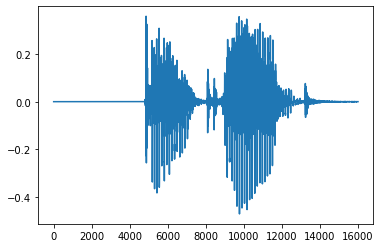

In [16]:
from torchaudio.datasets import SPEECHCOMMANDS
import os

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchaudio

import matplotlib.pyplot as plt
import IPython.display as ipd

def plot_specgram(waveform, sample_rate, title="Spectrogram", xlim=None):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape   # e.g., [1, 10923]
    time_axis = torch.arange(0, num_frames) / sample_rate

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].specgram(waveform[c], Fs=sample_rate)
        if num_channels > 1:
            axes[c].set_ylabel(f'Channel {c+1}')
        if xlim:
            axes[c].set_xlim(xlim)
    figure.suptitle(title)
    plt.show(block=False)

class SubsetSC(SPEECHCOMMANDS):
    def __init__(self, subset: str = None):
        super().__init__("../dataset", download=True)

        def load_list(filename):
            filepath = os.path.join(self._path, filename)
            with open(filepath) as fileobj:
                return [os.path.join(self._path, line.strip()) for line in fileobj]

        if subset == "validation":
            self._walker = load_list("validation_list.txt")
        elif subset == "testing":
            self._walker = load_list("testing_list.txt")
        elif subset == "training":
            excludes = load_list("validation_list.txt") + load_list("testing_list.txt")
            excludes = set(excludes)
            self._walker = [w for w in self._walker if w not in excludes]

    
train_set = SubsetSC("training")
test_set = SubsetSC("testing")
waveform, sample_rate, label, speaker_id, utterance_number = train_set[22]
print(waveform.shape, sample_rate, label, speaker_id, utterance_number)
# plt.plot(waveform.t().numpy())

torch.Size([1, 100, 126])


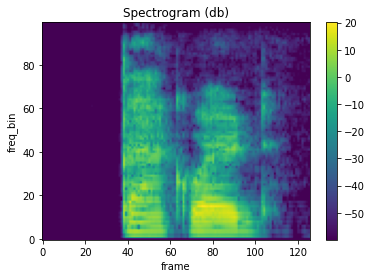

In [44]:
import torchaudio.transforms as transforms_au
import librosa

def plot_spectrogram(spec, title=None, ylabel='freq_bin', aspect='auto', xmax=None):
  fig, axs = plt.subplots(1, 1)
  axs.set_title(title or 'Spectrogram (db)')
  axs.set_ylabel(ylabel)
  axs.set_xlabel('frame')
  im = axs.imshow(librosa.power_to_db(spec), origin='lower', aspect=aspect)
  if xmax:
    axs.set_xlim((0, xmax))
  fig.colorbar(im, ax=axs)
  plt.show(block=False)

n_fft = 1024; hop_length = 512
n_fft = 512; hop_length = 256
n_fft = 256; hop_length = 128

mel_spectrogram = transforms_au.MelSpectrogram(
    sample_rate=8000,
    n_fft=n_fft,
    win_length=None,
    hop_length=hop_length,
    power=2.0,
    n_mels=100,  # how many rows
)

melspec = librosa.power_to_db(mel_spectrogram(waveform))
melspec = mel_spectrogram(waveform)
print(melspec.shape)
plot_spectrogram(melspec[0])

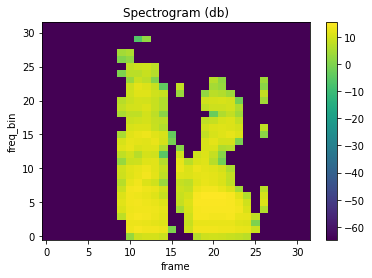

In [28]:
import torchaudio.transforms as T
import librosa
from collections import Counter
import numpy as np


  
a=torch.load("./data/training_data.pt")
plot_spectrogram(a[22,0])


# min_a=[]; max_a=[]
# for i in range(20):
#     max_a.append(torch.max(a[i,0]))
#     min_a.append(torch.min(a[i,0]))
# print(min_a, max_a)


# Create training and testing split of the data. We do not use validation in this tutorial.
# train_set = SubsetSC("training")
# test_set = SubsetSC("testing")
# val_set = SubsetSC("validation")
# print(len(train_set), len(test_set), len(val_set))  # 84843 11005 9981

# labels_train = []
# for i in range(84843):
#     waveform, sample_rate, label, speaker_id, utterance_number = train_set[i]
#     labels_train.append(label)
# count_train = Counter(labels_train)

# labels_val = []
# for i in range(9981):
#     waveform, sample_rate, label, speaker_id, utterance_number = val_set[i]
#     labels_val.append(label)
# count_val= Counter(labels_val)

# labels_test = []
# for i in range(11005):
#     waveform, sample_rate, label, speaker_id, utterance_number = test_set[i]
#     labels_test.append(label)
# count_test = Counter(labels_test)


# labels_val_test = []
# for i in range(9981):
#     waveform, sample_rate, label, speaker_id, utterance_number = val_set[i]
#     labels_val_test.append(label)
# for i in range(11005):
#     waveform, sample_rate, label, speaker_id, utterance_number = test_set[i]
#     labels_val_test.append(label)
# count_val_test = Counter(labels_val_test)
# print(count_val_test)

# print(count_train, count_val, count_test)
# Counter({'zero': 3250, 'five': 3240, 'yes': 3228, 'seven': 3205, 'nine': 3170, 'one': 3140, 'down': 3134, 'no': 3130, 'stop': 3111, 'two': 3111, 'go': 3106, 'six': 3088, 'on': 3086, 'left': 3037, 'eight': 3033, 'right': 3019, 'off': 2970, 'three': 2966, 'four': 2955, 'up': 2948, 'house': 1727, 'wow': 1724, 'dog': 1711, 'marvin': 1710, 'bird': 1697, 'cat': 1657, 'happy': 1632, 'sheila': 1606, 'bed': 1594, 'tree': 1407, 'backward': 1346, 'visual': 1288, 'learn': 1286, 'follow': 1275, 'forward': 1256}) 

# Counter({'no': 406, 'yes': 397, 'seven': 387, 'zero': 384, 'six': 378, 'down': 377, 'off': 373, 'four': 373, 'go': 372, 'five': 367, 'right': 363, 'on': 363, 'nine': 356, 'three': 356, 'left': 352, 'one': 351, 'stop': 350, 'up': 350, 'eight': 346, 'two': 345, 'happy': 219, 'bed': 213, 'sheila': 204, 'dog': 197, 'marvin': 195, 'house': 195, 'wow': 193, 'bird': 182, 'cat': 180, 'tree': 159, 'backward': 153, 'forward': 146, 'visual': 139, 'follow': 132, 'learn': 128}) 

# Counter({'five': 445, 'up': 425, 'two': 424, 'yes': 419, 'zero': 418, 'left': 412, 'stop': 411, 'eight': 408, 'nine': 408, 'seven': 406, 'down': 406, 'no': 405, 'three': 405, 'go': 402, 'off': 402, 'four': 400, 'one': 399, 'right': 396, 'on': 396, 'six': 394, 'dog': 220, 'sheila': 212, 'bed': 207, 'wow': 206, 'happy': 203, 'marvin': 195, 'cat': 194, 'tree': 193, 'house': 191, 'bird': 185, 'follow': 172, 'backward': 165, 'visual': 165, 'learn': 161, 'forward': 155})



In [22]:
print("Shape of waveform: {}".format(waveform.size()))
print("Sample rate of waveform: {}".format(sample_rate))
print(label, speaker_id, utterance_number)

# plt.plot(waveform.t().numpy())
# plot_specgram(waveform, sample_rate)
print(waveform.shape)
print(len(train_set), len(test_set), len(val_set))

n_fft = 1024
win_length = None
hop_length = 512
n_mels = 32
mel_spectrogram = T.MelSpectrogram(
    sample_rate=sample_rate,
    n_fft=n_fft,
    win_length=win_length,
    hop_length=hop_length,
    power=2.0,
    n_mels=n_mels,
)

melspec = mel_spectrogram(waveform)
plot_spectrogram(melspec[0], title="MelSpectrogram - torchaudio", ylabel='mel freq')
print(melspec.shape)




# import torchaudio.transforms as T
# import librosa

# def plot_spectrogram(spec, title=None, ylabel='freq_bin', aspect='auto', xmax=None):
#   fig, axs = plt.subplots(1, 1)
#   axs.set_title(title or 'Spectrogram (db)')
#   axs.set_ylabel(ylabel)
#   axs.set_xlabel('frame')
#   im = axs.imshow(librosa.power_to_db(spec), origin='lower', aspect=aspect)
#   if xmax:
#     axs.set_xlim((0, xmax))
#   fig.colorbar(im, ax=axs)
#   plt.show(block=False)

# n_fft = 1024
# win_length = None
# hop_length = 256
# n_mels = 256
# n_mfcc = 32

# mfcc_transform = T.MFCC(
#     sample_rate=sample_rate,
#     n_mfcc=n_mfcc,
#     melkwargs={
#       'n_fft': n_fft,
#       'n_mels': n_mels,
#       'hop_length': hop_length
#     }
# )

# mfcc = mfcc_transform(waveform)
# plot_spectrogram(mfcc[0])
# print(mfcc.shape)

Shape of waveform: torch.Size([1, 16000])
Sample rate of waveform: 16000
backward 0585b66d 2
torch.Size([1, 16000])


NameError: name 'val_set' is not defined

In [ ]:
import torch
import os
import torch.distributed as dist
import torch.multiprocessing as mp

def run(rank, size):
    """ Distributed function to be implemented later. """
    print(f'rank {rank} of {size}')

def init_process(rank, size, data, fn, backend='gloo'):
    """ Initialize the distributed environment. """
    os.environ['MASTER_ADDR'] = '127.0.0.1'
    os.environ['MASTER_PORT'] = '29500'
    dist.init_process_group(backend, rank=rank, world_size=size)
    fn(rank, size)

def processes(data):
    size = len(data)
    processes = []
    # mp.set_start_method("spawn")

    for rank in range(size):
        
        data = [i.clone() for i in data]
        p = mp.Process(target=init_process, args=(rank, size, data, run))
        p.start()
        processes.append(p)
    for p in processes:
        p.join()


if __name__ == "__main__":
    size_vector = 133
    part = int(size_vector/8)
    indices = torch.arange(size_vector)
    split_data = torch.split(indices, part)
    print(split_data)
    processes(split_data)

(tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]), tensor([16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]), tensor([32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]), tensor([48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]), tensor([64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]), tensor([80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]), tensor([ 96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
        110, 111]), tensor([112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
        126, 127]), tensor([128, 129, 130, 131, 132]))


Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/home/zhangxianghui/miniconda3/envs/ml/lib/python3.8/multiprocessing/spawn.py", line 116, in spawn_main
    exitcode = _main(fd, parent_sentinel)
  File "/home/zhangxianghui/miniconda3/envs/ml/lib/python3.8/multiprocessing/spawn.py", line 126, in _main
    self = reduction.pickle.load(from_parent)
AttributeError: Can't get attribute 'init_process' on <module '__main__' (built-in)>
Traceback (most recent call last):
Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/home/zhangxianghui/miniconda3/envs/ml/lib/python3.8/multiprocessing/spawn.py", line 116, in spawn_main
  File "<string>", line 1, in <module>
    exitcode = _main(fd, parent_sentinel)
  File "/home/zhangxianghui/miniconda3/envs/ml/lib/python3.8/multiprocessing/spawn.py", line 126, in _main
  File "/home/zhangxianghui/miniconda3/envs/ml/lib/python3.8/multiprocessing/spawn.py", line 116, in spawn_main
    self = re